<a href="https://colab.research.google.com/github/RajatSaha1106/Quantum-Noise-Modelling/blob/main/qml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ModuleNotFoundError: No module named 'pennylane'

In [3]:
pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 31.2 MB/s eta 0:00:00


Epoch 1/30, Cost: 0.3224002295441289
Epoch 2/30, Cost: 0.31755546585041816
Epoch 3/30, Cost: 0.31297724788026776
Epoch 4/30, Cost: 0.3086421369138255
Epoch 5/30, Cost: 0.3045283983134429
Epoch 6/30, Cost: 0.3006158965926252
Epoch 7/30, Cost: 0.2968860242037488
Epoch 8/30, Cost: 0.2933216446231136
Epoch 9/30, Cost: 0.2899070382159892
Epoch 10/30, Cost: 0.28662784487467546
Epoch 11/30, Cost: 0.2834710010506023
Epoch 12/30, Cost: 0.28042467102373336
Epoch 13/30, Cost: 0.277478173476339
Epoch 14/30, Cost: 0.2746219049895755
Epoch 15/30, Cost: 0.2718472622072209
Epoch 16/30, Cost: 0.2691465642893306
Epoch 17/30, Cost: 0.2665129770315378
Epoch 18/30, Cost: 0.26394043973246406
Epoch 19/30, Cost: 0.2614235956003286
Epoch 20/30, Cost: 0.2589577262267838
Epoch 21/30, Cost: 0.25653869043337524
Epoch 22/30, Cost: 0.25416286761694024
Epoch 23/30, Cost: 0.2518271055826304
Epoch 24/30, Cost: 0.24952867275223634
Epoch 25/30, Cost: 0.24726521456523276
Epoch 26/30, Cost: 0.2450347138444064
Epoch 27/30, 

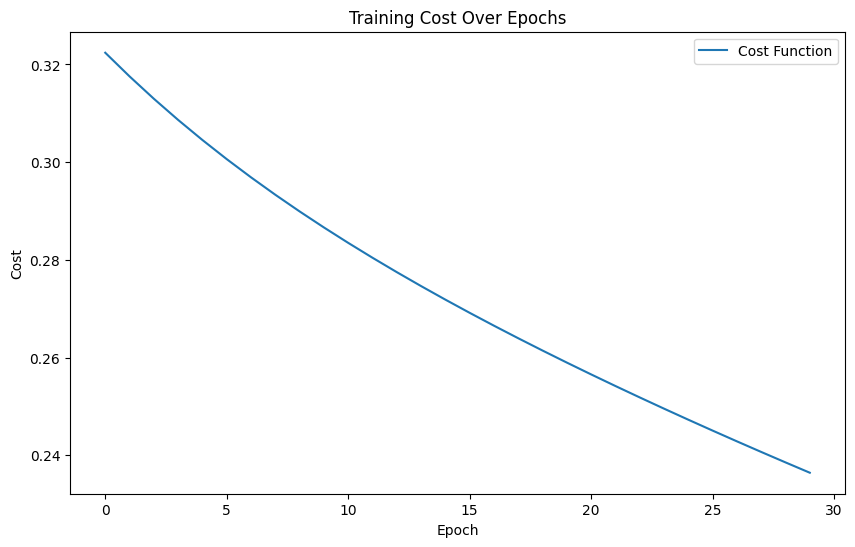

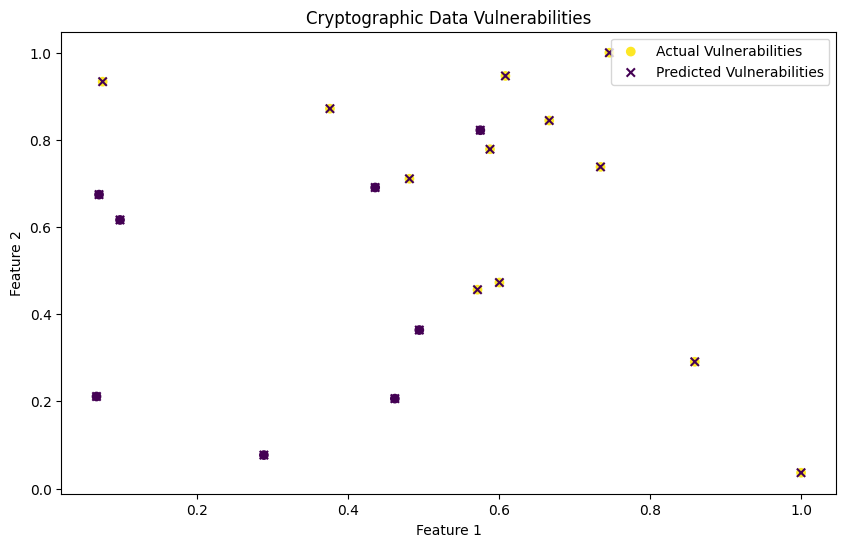

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pennylane as qml
from pennylane import numpy as pnp
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the quantum device
dev = qml.device('default.qubit', wires=4)

# Define the quantum neural network
@qml.qnode(dev)
def qnn(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(4))
    qml.BasicEntanglerLayers(weights, wires=range(4))
    return qml.expval(qml.PauliZ(0))

# Define the cost function
def cost(weights, X, y):
    predictions = pnp.array([qnn(x, weights) for x in X])
    return pnp.mean((predictions - y) ** 2)

# Generate synthetic cryptographic data with vulnerabilities
def generate_data(num_samples=100):
    X = np.random.rand(num_samples, 4)
    y = np.array([1 if np.sum(x) > 2 else 0 for x in X])  # Simple vulnerability pattern
    return X, y

# Prepare the data
X, y = generate_data(100)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize weights
weights = pnp.random.randn(2, 4)

# Training loop
opt = qml.GradientDescentOptimizer(stepsize=0.1)
num_epochs = 30
costs = []

for epoch in range(num_epochs):
    weights = opt.step(lambda w: cost(w, X_train, y_train), weights)
    curr_cost = cost(weights, X_train, y_train)
    costs.append(curr_cost)
    print(f"Epoch {epoch + 1}/{num_epochs}, Cost: {curr_cost}")

print("Training complete")

# Predict on test data
predictions = [qnn(x, weights) for x in X_test]
binary_predictions = [1 if p > 0 else 0 for p in predictions]

# Evaluate the model
accuracy = accuracy_score(y_test, binary_predictions)
conf_matrix = confusion_matrix(y_test, binary_predictions)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the cost function
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), costs, label='Cost Function')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Training Cost Over Epochs')
plt.legend()
plt.show()

# Visualize the collisions and vulnerabilities
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', label='Actual Vulnerabilities')
plt.scatter(X_test[:, 0], X_test[:, 1], c=binary_predictions, marker='x', label='Predicted Vulnerabilities')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cryptographic Data Vulnerabilities')
plt.legend()
plt.show()